Importanto as Bibliotecas e o DataSet

In [2]:
import pandas as pd
import numpy as np

In [41]:
df = pd.read_csv('Anexo Certificacao - Data Cleaning e Data Wrangling.csv')
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [3]:
df.shape

(129971, 14)

<font color='DeepSkyBlue'>Questão 01: Para cada variável, verifique o percentual de registros nulos. Quantas variáveis possuem percentual de nulos acima de 25%? </p></font>
<font color='limegreen'>Resposta: 2</font>

In [56]:
df_qtda_null = pd.DataFrame(round(df.isnull().sum(axis=0) / df.shape[0], 2), columns=['qtda_null'])
df_qtda_null = df_qtda_null.loc[df_qtda_null['qtda_null'] > 0.25, 'qtda_null']
df_qtda_null

designation    0.29
region_2       0.58
Name: QTDA_NULL, dtype: float64

<font color='DeepSkyBlue'>Questão 02: Veja a distribuição da variável 'points' e assinale a opção que melhor explica o que o código da imagem faz:</p></font>
<font color='limegreen'>Resposta: Aplica um discretização equal-width na variável points, criando 4 grupos: 80, 85, 90, 95</font>

In [ ]:
df = pd.read_csv('Anexo Certificacao - Data Cleaning e Data Wrangling.csv')

<AxesSubplot:>

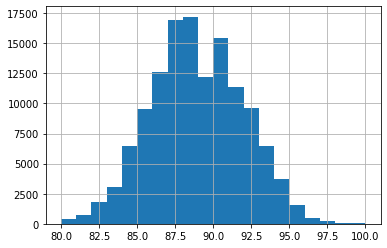

In [5]:
df['points'].hist(bins=20)

In [126]:
from sklearn.preprocessing import KBinsDiscretizer

train = df.points.dropna().values.reshape(-1, 1)
discretizer = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='uniform')
discretizer.fit(train)
df['points_group'] = discretizer.transform(train) * 5 + 80

In [127]:
df['points_group'].value_counts()

85.0    68496
90.0    46629
80.0    12430
95.0     2416
Name: points_group, dtype: int64

<font color='DeepSkyBlue'>Questão 03: Crie o dataset abaixo:</p>
df_price_per_group = df[['country', 'points_group', 'price']].groupby(['country', 'points_group']).mean() </p>
Faça um merge left dele com o df principal, pelas chaves ['country', 'points_group'] e aplique o sufixo 'per_group' nas variáveis do Segundo dataset.</p>
Substitua os valores nulos de 'Price' pelos valores na nova coluna 'Price_per_group'.</p>
Qual a nova média da variável 'Price'?</font></p>
<font color='limegreen'>Resposta: 35.605249</font>

In [128]:
df_price_per_group = df[['country', 'points_group', 'price']].groupby(['country', 'points_group']).mean()
df_price_per_group

price
country   points_group           
Argentina 80.0          14.421735
          85.0          19.427708
          90.0          50.348745
          95.0          83.363636
Armenia   85.0          14.500000
...                           ...
Ukraine   80.0           9.300000
          85.0           9.000000
Uruguay   80.0          19.625000
          85.0          25.205882
          90.0          40.764706

[120 rows x 1 columns]

In [131]:
df_merge = pd.merge(df, df_price_per_group, left_on=['country', 'points_group'], right_on=['country', 'points_group'], how='left', suffixes=('', '_per_group'))
df_merge.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,points_group,price_per_group
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,85.0,28.757327
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,85.0,16.554805
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,85.0,29.088498
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,85.0,29.088498
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,85.0,29.088498


In [133]:
# substituir valores nulos no df mergiado
df_merge['price'].fillna(df_merge['price_per_group'], inplace=True)
df_merge.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,points_group,price_per_group
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,28.757327,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,85.0,28.757327
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,85.0,16.554805
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.000000,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,85.0,29.088498
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,85.0,29.088498
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,85.0,29.088498


In [134]:
# nova media na variavel price apos substituição dos valores
df_merge.describe()

,Unnamed: 0,points,price,points_group,price_per_group
count,129971.000000,129971.000000,129966.000000,129971.000000,129907.000000
mean,64985.000000,88.447138,35.605249,86.501527,35.610250
std,37519.540256,3.039730,40.386265,3.311255,21.441403
min,0.000000,80.000000,4.000000,80.000000,9.000000
25%,32492.500000,86.000000,17.312696,85.000000,24.963617
50%,64985.000000,88.000000,26.000000,85.000000,29.088498
75%,97477.500000,91.000000,43.000000,90.000000,47.076489
max,129970.000000,100.000000,3300.000000,95.000000,233.121807


<font color='DeepSkyBlue'>Questão 04: Vamos tratar os outliers variável 'Price' (lembre-se de recarregar o dataset). Remova os registros nulos e calcule o z-score para cada registro. De acordo com essa técnica, quantos outliers tem na variável Preço?</font></p>
<font color='limegreen'>Resposta: 1177</font>

In [57]:
df = pd.read_csv('Anexo Certificacao - Data Cleaning e Data Wrangling.csv')

In [58]:
pd.DataFrame(df.isnull().sum(axis=0), columns=['qtda_null']).sort_values(by=['qtda_null'], ascending=False)/df.shape[0]*100

,qtda_null
region_2,61.136715
designation,28.825661
taster_twitter_handle,24.015357
taster_name,20.192197
region_1,16.347493
price,6.921544
country,0.048472
province,0.048472
variety,0.000769
Unnamed: 0,0.000000


In [59]:
df = df.dropna(subset=['price'])
df['price'].mean()

35.363389129985535

In [60]:
df.describe()

,Unnamed: 0,points,price
count,120975.000000,120975.000000,120975.000000
mean,65045.760628,88.421881,35.363389
std,37512.060879,3.044508,41.022218
min,1.000000,80.000000,4.000000
25%,32574.500000,86.000000,17.000000
50%,65144.000000,88.000000,25.000000
75%,97506.500000,91.000000,42.000000
max,129970.000000,100.000000,3300.000000


In [67]:
from scipy import stats
z = np.abs(stats.zscore(df.price))
df.price[z>3].shape[0]

1177

<font color='DeepSkyBlue'>Questão 05: Veja a distribuição da variável 'Country'. Repare que há categorias muito pouco representativas. Se aplicarmos o princípio de Pareto, podemos filtrar somente os 7 países mais representativos da base que são:</font></p>
<font color='limegreen'>Resposta: US, France, Italy, Spain, Portugal, Chile, Argentina, representando 90% da base</font>

In [69]:
df = pd.read_csv('Anexo Certificacao - Data Cleaning e Data Wrangling.csv')

In [103]:
qtda = dict(df['country'].value_counts() / df.shape[0])

In [104]:
df_country = pd.DataFrame.from_dict(qtda, orient='index', columns=['qtda_country'])
df_country['sum_acum'] = round(df_country['qtda_country'].cumsum(), 2)
df_country.head(7)

,qtda_country,sum_acum
US,0.419355,0.42
France,0.169984,0.59
Italy,0.150341,0.74
Spain,0.051127,0.79
Portugal,0.043787,0.83
Chile,0.034408,0.87
Argentina,0.029237,0.90


In [181]:
df_country_pareto = df.country.value_counts().reset_index()
df_country_pareto.rename({'index':'country', 'country': 'absoluto'}, axis=1, inplace=True)
df_country_pareto['relativo'] = df_country_pareto['absoluto'] / df_country_pareto['absoluto'].sum() * 100
df_country_pareto['relativo_acumulado'] = round(df_country_pareto['relativo'].cumsum(), 3)
df_country_pareto.head(10)

,country,absoluto,relativo,relativo_acumulado
0,US,54504,41.955846,41.956
1,France,22093,17.006651,58.962
2,Italy,19540,15.041414,74.004
3,Spain,6645,5.115158,79.119
4,Portugal,5691,4.380793,83.500
5,Chile,4472,3.442436,86.942
6,Argentina,3800,2.925147,89.867
7,Austria,3345,2.574899,92.442
8,Australia,2329,1.792807,94.235
9,Germany,2165,1.666564,95.902


C:\Users\Italo\AppData\Local\Temp/ipykernel_16076/169548345.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(list(df_country_pareto['country']), rotation = 25)


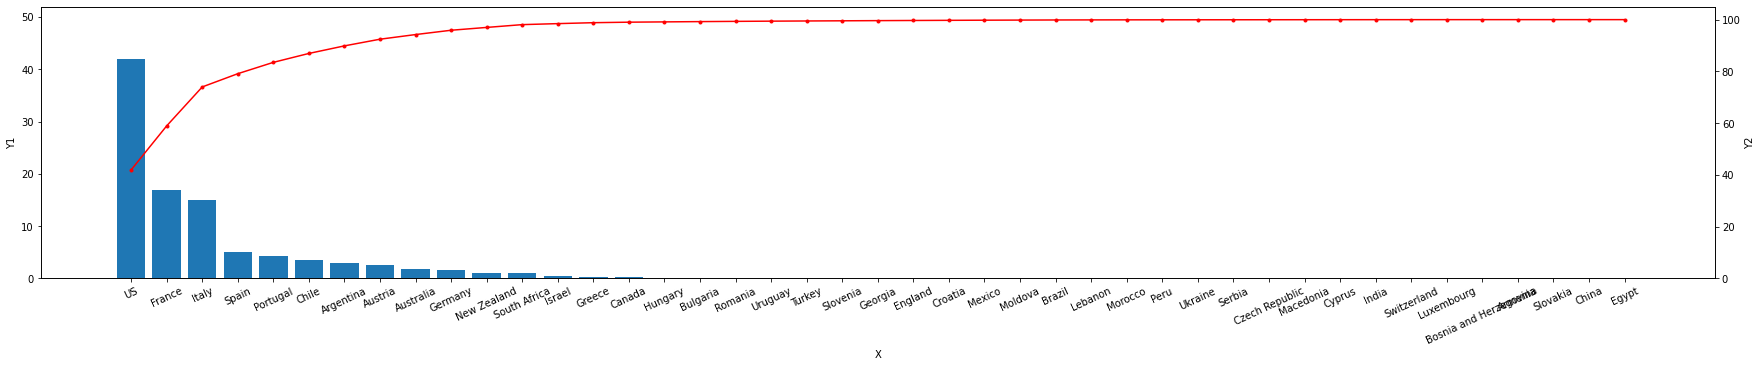

<Figure size 3600x3600 with 0 Axes>

In [183]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(30, 5))

plt.figure(figsize = (50, 50))
ax.set_xlabel('X')
ax.set_ylabel('Y1')
ax.bar(list(df_country_pareto['country']), list(df_country_pareto['relativo']))
ax.set_ylim([0, max(list(df_country_pareto['relativo']))+10])

ax.set_xticklabels(list(df_country_pareto['country']), rotation = 25)

ax2 = ax.twinx()
ax2.set_ylabel('Y2')
ax2.plot(list(df_country_pareto['country']), list(df_country_pareto['relativo_acumulado']), color = 'r', marker='.')
ax2.set_ylim([0, 105])

plt.show()

<font color='DeepSkyBlue'>Questão 06: Filtre o país dos Estados Unidos. Aplique o One-Hot Enconding na variável "Province" considerando somente as categorias com pelo menos 100 registros. Qual o mínimo de novas categorias criadas?</font></p>
<font color='limegreen'>Resposta: 7</font>

In [105]:
df = pd.read_csv('Anexo Certificacao - Data Cleaning e Data Wrangling.csv')

In [177]:
df[df['country'] == 'US']['province'].value_counts().head(7)

California    36247
Washington     8639
Oregon         5373
New York       2688
Virginia        777
Idaho           192
Michigan        114
Name: province, dtype: int64

In [180]:
df_filter = df.loc[(df['country'] == 'US') & (df_filter.province.map(df_filter.province.value_counts() >= 100)), ['country', 'province']]
#df_filter = df_filter[df_filter.province.map(df_filter.province.value_counts() >= 100)]
df_filter.drop_duplicates().sort_values('province').reset_index(drop=True)

,country,province
0,US,California
1,US,Idaho
2,US,Michigan
3,US,New York
4,US,Oregon
5,US,Virginia
6,US,Washington


<font color='DeepSkyBlue'>Questão 07: A distribuição da variável Price é bastante desnormalizada, como podemos ver na imagem 1. Aplicando a transformação do Box-Cox, podemos melhorar muitoo sua distribuição como está representando na imagem 2. </p>
Assinale o valor do lambda que promoveu essa transformação (lembre de recarregar o dataset original):</font></p>
<font color='limegreen'>Resposta: -0.2962151</font>

In [185]:
df = pd.read_csv('Anexo Certificacao - Data Cleaning e Data Wrangling.csv')

In [186]:
from sklearn.preprocessing import PowerTransformer

array([-0.2962151])

Text(0.5, 1.0, 'price_box-cox')

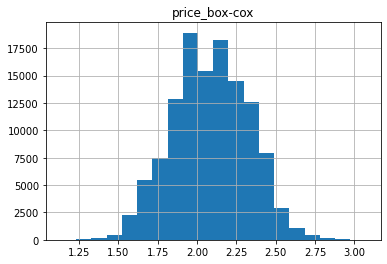

In [187]:
boxcox_transformer = PowerTransformer(method='box-cox', standardize=False)
df['price_box-cox'] = boxcox_transformer.fit_transform(df[['price']])
display(boxcox_transformer.lambdas_)
df['price_box-cox'].hist(bins=20)
plt.title('price_box-cox')

<font color='DeepSkyBlue'>Questão 08: Vamos tratar o campo 'Description'. Assinale o resultado produzido pelo código da imagem ao lado. </p>
<font color='limegreen'>Resposta: Letra B</font>

In [3]:
df = pd.read_csv('Anexo Certificacao - Data Cleaning e Data Wrangling.csv')

In [4]:
from nltk.tokenize import word_tokenize
from nltk.tokenize import TreebankWordTokenizer, WordPunctTokenizer, WhitespaceTokenizer
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
import string
import re
snowball_stemmer = SnowballStemmer('portuguese')

In [17]:
def clean_text(sentence):
    word_tokens = word_tokenize(sentence)
    new_words = [word for word in word_tokens if (word not in string.punctuation and not re.match('[0-9]+', word))]
    clean_tokens = new_words[:]
    for token in clean_tokens:
        if token in stopwords.words('english'):
            clean_tokens.remove(token)
    return ' '.join(clean_tokens)

In [37]:
df_description = df.description.loc[:10]
df_description

0     Aromas include tropical fruit, broom, brimston...
1     This is ripe and fruity, a wine that is smooth...
2     Tart and snappy, the flavors of lime flesh and...
3     Pineapple rind, lemon pith and orange blossom ...
4     Much like the regular bottling from 2012, this...
5     Blackberry and raspberry aromas show a typical...
6     Here's a bright, informal red that opens with ...
7     This dry and restrained wine offers spice in p...
8     Savory dried thyme notes accent sunnier flavor...
9     This has great depth of flavor with its fresh ...
10    Soft, supple plum envelopes an oaky structure ...
Name: description, dtype: object

In [46]:
for row in df_description:
    print(clean_text(row))

Aromas include tropical fruit broom brimstone dried herb The palate n't overly expressive offering unripened apple citrus dried sage alongside brisk acidity
This ripe fruity wine is smooth still structured Firm tannins filled juicy red berry fruits freshened with acidity It 's already drinkable although will certainly better
Tart snappy flavors lime flesh rind dominate Some green pineapple pokes with crisp acidity underscoring flavors The wine all stainless-steel fermented
Pineapple rind lemon pith orange blossom start the aromas The palate a bit opulent notes honey-drizzled guava mango giving way a slightly astringent semidry finish
Much like regular bottling this comes across rather rough tannic rustic earthy herbal characteristics Nonetheless you think pleasantly unfussy country wine it 's a good companion a hearty winter stew
Blackberry raspberry aromas show typical Navarran whiff green herbs in case horseradish In mouth fairly full bodied tomatoey acidity Spicy herbal flavors comp

<font color='DeepSkyBlue'>Questão 09: Como há 425 províncias diferentes, ao invnés de criar uma variável para cada categoria, podemos criar uma variável que indica o preço médio daquela região para indicar se a província é conhecida por vinhos caros ou não. </p>
Agrupe o dataset por ['province', 'price'] e calcule a média do preço. Depois faça um merge com o dataset original e crie uma variável que indique a diferença entre o preço do vinho e o preço médio da região.</p>
O terceiro registro está acima ou abaixo da média de sua região?</p>
<font color='limegreen'>Resposta: ABAIXO</font>

In [88]:
df = pd.read_csv('Anexo Certificacao - Data Cleaning e Data Wrangling.csv')

In [89]:
df_groupby = df[['province', 'price']].groupby(by='province').agg({
    'price': 'mean',
    })
df_groupby.head()

,price
province,
Achaia,23.000000
Aconcagua Costa,23.074074
Aconcagua Valley,40.298246
Aegean,33.409091
Agioritikos,24.000000


In [92]:
df_merge = pd.merge(df, df_groupby, left_on='province', right_on='province', how='left')
df_merge.head()

,Unnamed: 0,country,description,designation,points,price_x,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,price_y
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,27.623477
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,29.141975
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,36.545064
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,32.432432
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,36.545064


In [102]:
df_merge['mean_price'] = df_merge.apply(lambda x: str('Acima de Média') if x['price_x'] > x['price_y'] else str('Abaixo da Média'), axis=1)

In [101]:
df_merge.head()

,Unnamed: 0,country,description,designation,points,price_x,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,price_y,mean_price
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,27.623477,Abaixo da Média
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,29.141975,Abaixo da Média
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,36.545064,Abaixo da Média
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,32.432432,Abaixo da Média
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,36.545064,Acima de Média


<font color='DeepSkyBlue'>Questão 10: Para replicar a dimensão nova criada no código da questão 9 no dataset de teste, é preciso: </p>
<font color='limegreen'>Resposta: </font>

In [106]:
df

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss
